In [467]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
import warnings
# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler

In [468]:
full_data = pd.read_csv('/content/IMDb Movies India.csv')

In [469]:
duplicate_rows_full_data=full_data[full_data.duplicated()]
print('the duplicate rows is:',duplicate_rows_full_data.shape)

the duplicate rows is: (6, 10)


In [470]:
full_data.shape

(15509, 10)

In [471]:
full_data=full_data.drop_duplicates()

In [472]:
full_data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [473]:
full_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [474]:
full_data.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [475]:
print(full_data.isnull().sum())

Name           0
Year         527
Duration    8264
Genre       1876
Rating      7584
Votes       7583
Director     524
Actor 1     1615
Actor 2     2381
Actor 3     3140
dtype: int64


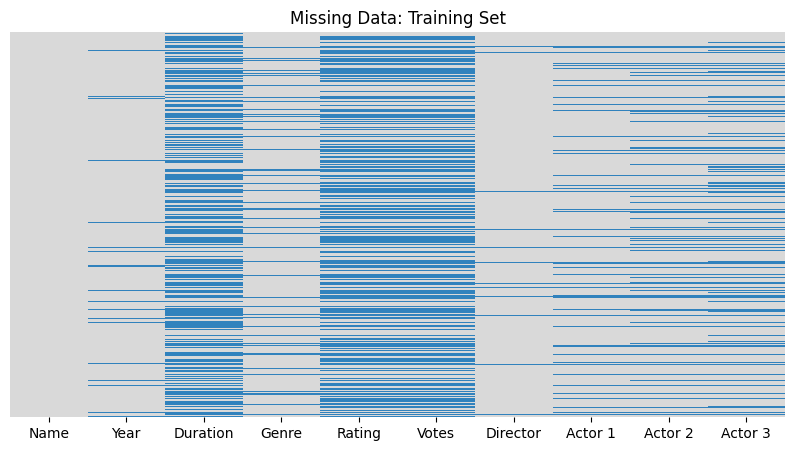

In [476]:
sns.heatmap(full_data.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

<Axes: xlabel='Rating'>

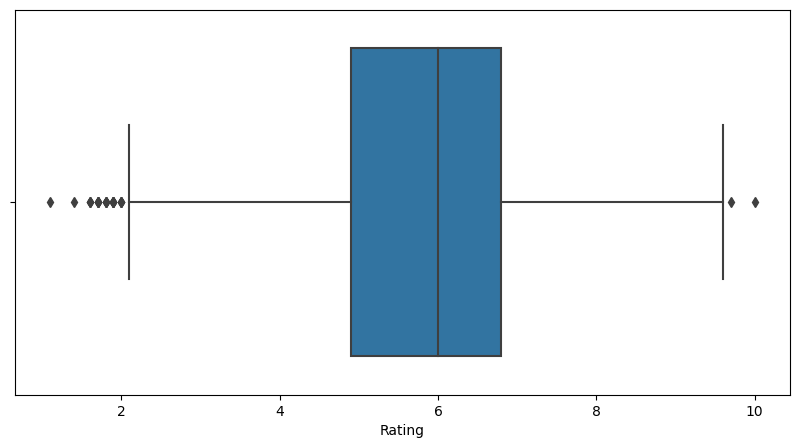

In [477]:
sns.boxplot(x=full_data['Rating'])


In [478]:
Q1 = full_data.quantile(0.25)
Q3 = full_data.quantile(0.75)
IQR = Q3-Q1
print("The interquartile range is: ", IQR)

The interquartile range is:  Rating    1.9
dtype: float64


In [479]:
full_data.head(2)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid


In [480]:
round(full_data.isnull().sum().sort_values(ascending=False)/len(full_data)*100,2)

Duration    53.31
Rating      48.92
Votes       48.91
Actor 3     20.25
Actor 2     15.36
Genre       12.10
Actor 1     10.42
Year         3.40
Director     3.38
Name         0.00
dtype: float64

In [481]:
full_data.head(2)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid


In [483]:
full_data['Duration'].fillna('120min', inplace=True)
full_data['Rating'].fillna('6.2', inplace=True)
full_data['Votes'].fillna('8', inplace=True)
full_data['Actor 3'].fillna('Pran', inplace=True)
full_data['Actor 2'].fillna('Rekha', inplace=True)
full_data['Genre'].fillna('Drama', inplace=True)
full_data['Actor 1'].fillna('Ashok Kumar', inplace=True)
full_data['Year'].fillna('(2019)', inplace=True)
full_data['Director'].fillna('Jayant Desai', inplace=True)




In [486]:
full_data.groupby('Actor 1')['Actor 1'].count().sort_values(ascending=False)


Actor 1
Ashok Kumar             1773
Jeetendra                140
Dharmendra               140
Mithun Chakraborty       133
Amitabh Bachchan         129
                        ... 
Karamaveer Chaudhary       1
Karan                      1
Karan Aanand               1
Karan Arora                1
Meezaan Jafri              1
Name: Actor 1, Length: 4718, dtype: int64

In [487]:
round(full_data.isnull().sum().sort_values(ascending=False)/len(full_data)*100,2)


Name        0.0
Year        0.0
Duration    0.0
Genre       0.0
Rating      0.0
Votes       0.0
Director    0.0
Actor 1     0.0
Actor 2     0.0
Actor 3     0.0
dtype: float64

In [ ]:
full_data.groupby('Director').Director.count().sort_values(ascending = False)

Director
Jayant Desai       58
Kanti Shah         57
Babubhai Mistry    50
Mahesh Bhatt       48
Master Bhagwan     46
                   ..
Kirti Rawal         1
Kiranraj K          1
Kiran Zaveri        1
Kiran Thej          1
Zunaid Memon        1
Name: Director, Length: 5938, dtype: int64

In [488]:
full_data.count()
full_data.shape

(15503, 10)

In [489]:
print(full_data.isnull().sum())

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64


In [ ]:
full_data.head(30)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
10,1:1.6 An Ode to Lost Love,(2004),96 min,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
11,1:13:7 Ek Tera Saath,(2016),120 min,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
12,100 Days,(1991),161 min,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey
13,100% Love,(2012),166 min,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh


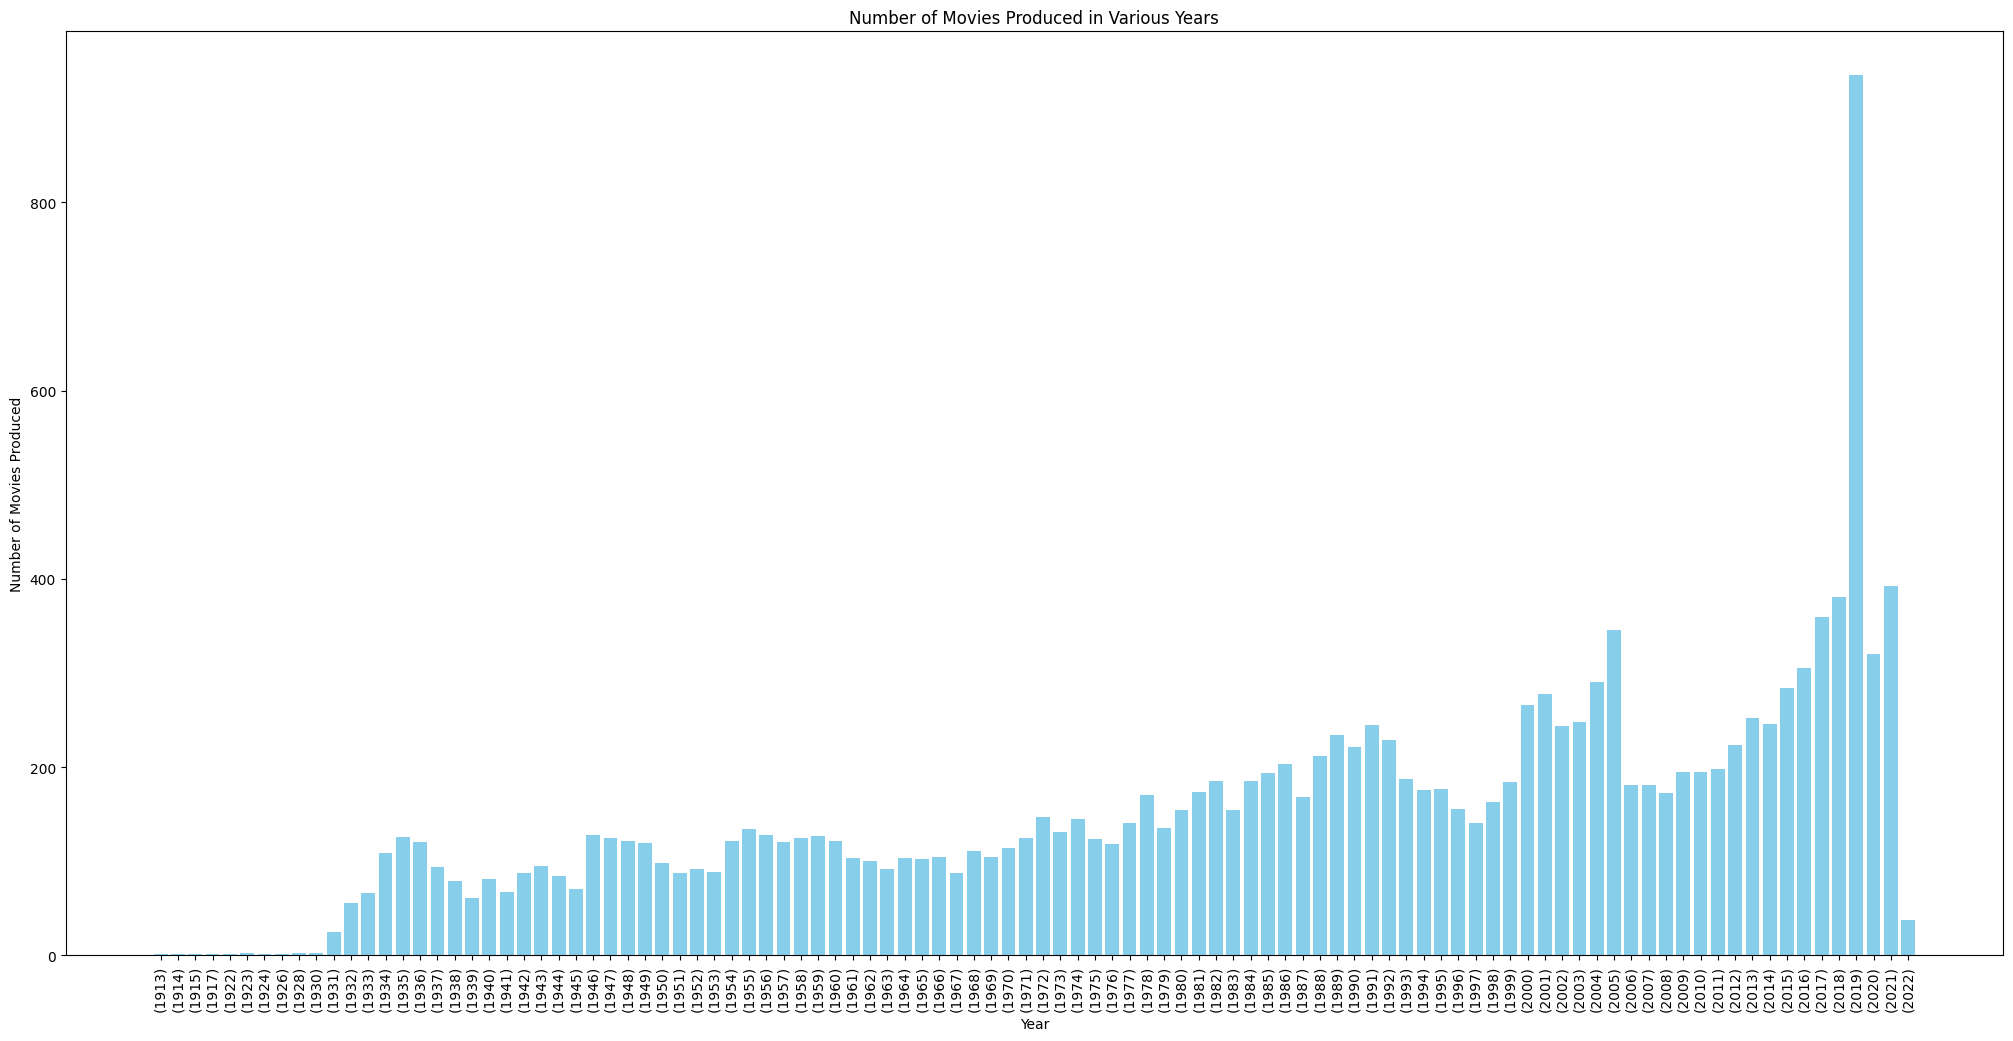

In [494]:
# Assuming 'df' is your DataFrame with 'Name' and 'Year' columns

# Count the number of movies produced in each year
year_counts = full_data['Year'].value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(25, 12))  # Set the figure size
plt.bar(year_counts.index, year_counts.values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Movies Produced')
plt.title('Number of Movies Produced in Various Years')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.show()

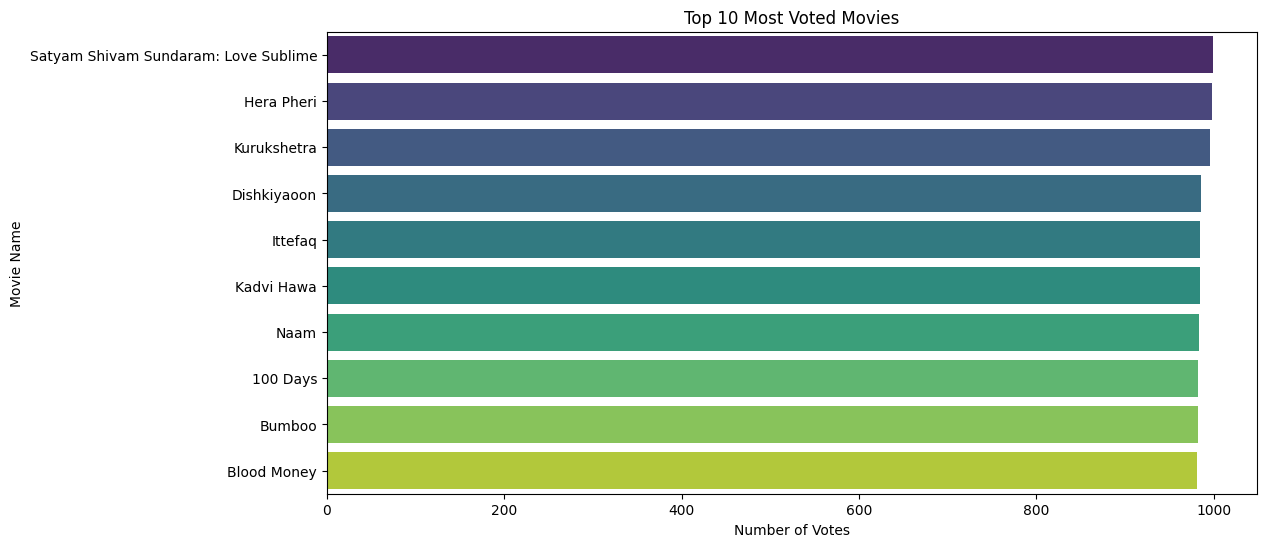

In [497]:
# Convert the 'Votes' column to numeric
full_data['Votes'] = pd.to_numeric(full_data['Votes'], errors='coerce')

# Sort the DataFrame by 'Votes' in descending order and select the top 10
top_10_voted = full_data.sort_values(by='Votes', ascending=False).head(10)

# Create a bar chart using Seaborn
plt.figure(figsize=(12, 6))  # Set the figure size
sns.barplot(x='Votes', y='Name', data=top_10_voted, palette='viridis')
plt.xlabel('Number of Votes')
plt.ylabel('Movie Name')
plt.title('Top 10 Most Voted Movies')
plt.show()

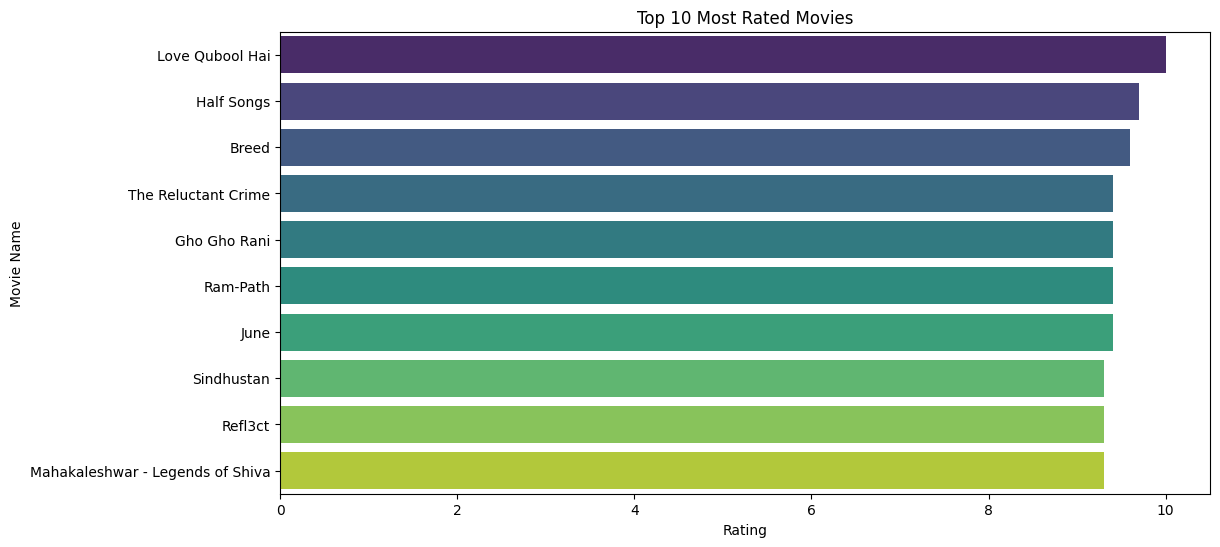

In [500]:
# Convert the 'Rating' column to numeric
full_data['Rating'] = pd.to_numeric(full_data['Rating'], errors='coerce')

# Sort the DataFrame by 'Rating' in descending order and select the top 10
top_10_rated = full_data.sort_values(by='Rating', ascending=False).head(10)

# Create a bar chart using Seaborn
plt.figure(figsize=(12, 6))  # Set the figure size
sns.barplot(x='Rating', y='Name', data=top_10_rated, palette='viridis')
plt.xlabel('Rating')
plt.ylabel('Movie Name')
plt.title('Top 10 Most Rated Movies')
plt.show()

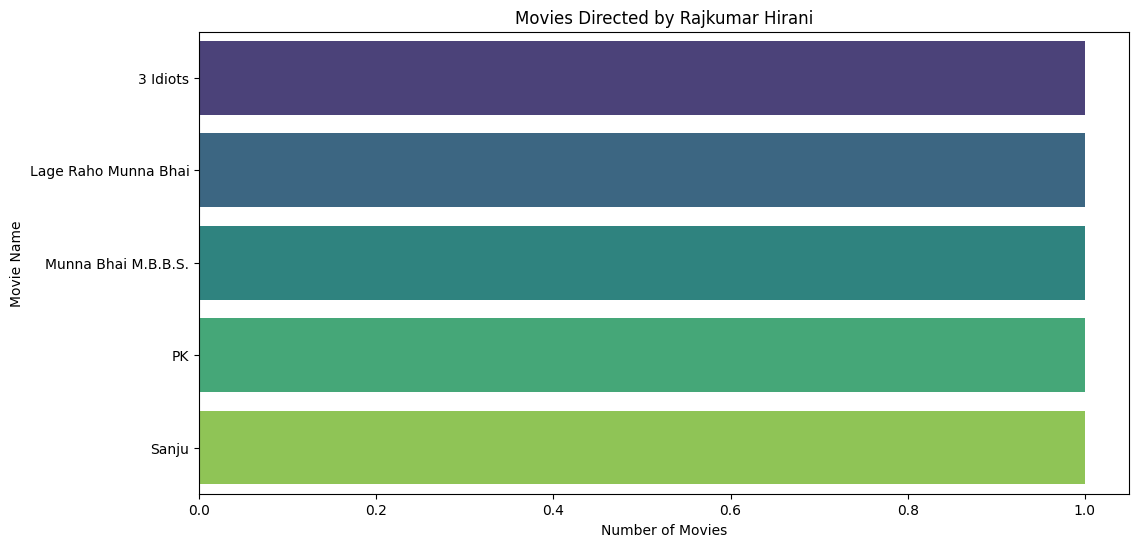

In [504]:

rajkumar_hirani_movies = full_data[full_data['Director'] == 'Rajkumar Hirani']

# Create a countplot using Seaborn
plt.figure(figsize=(12, 6))  # Set the figure size
sns.countplot(data=rajkumar_hirani_movies, y='Name', palette='viridis')
plt.xlabel('Number of Movies')
plt.ylabel('Movie Name')
plt.title('Movies Directed by Rajkumar Hirani')
plt.show()

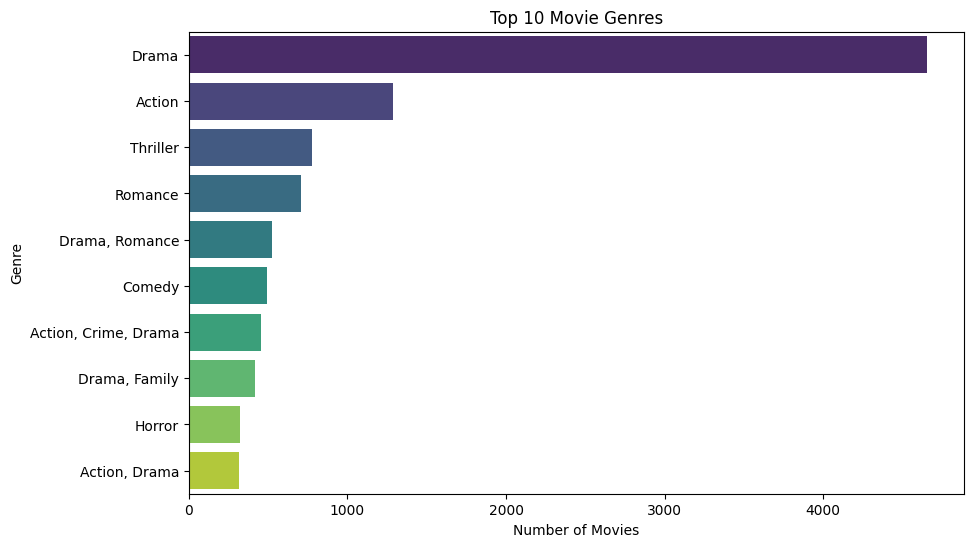

In [507]:
# Count the number of movies in each genre
genre_counts = full_data['Genre'].value_counts()

# Select the top N genres to display (you can adjust N as needed)
top_genres = genre_counts.head(10)

# Create a horizontal bar chart using Seaborn
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.title('Top 10 Movie Genres')
plt.xticks(rotation=0)  # Remove x-axis label rotation

plt.show()

        Decade                        Name  Rating
Decade                                            
1910      1910                 Lanka Dahan     6.7
1920      1920         Bhakta Gora Kumbhar     6.2
1930      1930                Mother India     9.0
1940      1940                      Udhaar     8.9
1950      1950         Mahishasura Mardini     9.0
1960      1960  Sri Venkateswara Mahathyam     8.5
1970      1970         Raja Harishchandrra     9.0
1980      1980              Ek Naya Itihas     8.6
1990      1990                         Dus     9.1
2000      2000                 I'm in Love     9.2
2010      2010                Gho Gho Rani     9.4
2020      2020             Love Qubool Hai    10.0


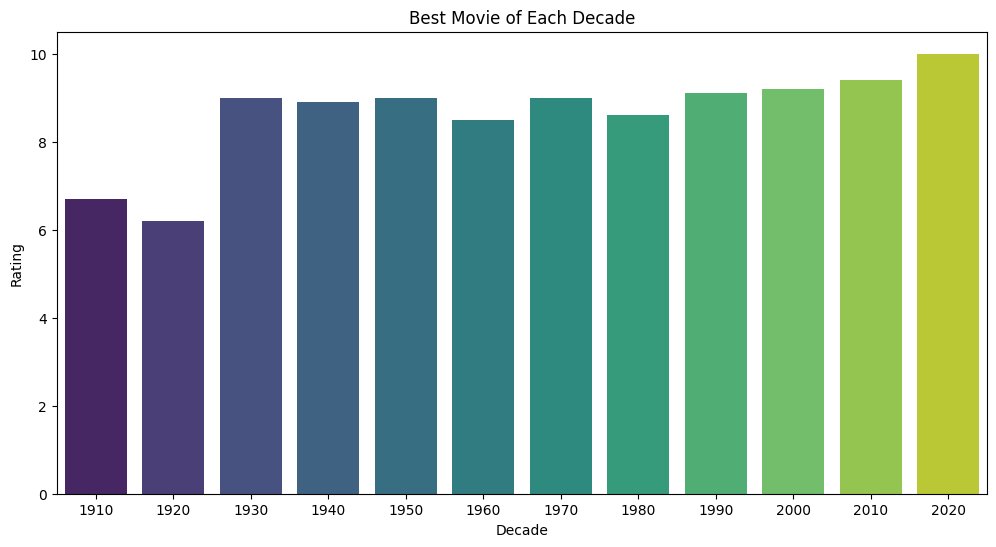

In [513]:
# Convert 'Year' to a decade format (e.g., 1995 -> 1990s)
full_data['Decade'] = (full_data['Year'] // 10) * 10

# Group movies by decade and find the best-rated movie in each decade
best_movies = full_data.groupby('Decade').apply(lambda x: x.loc[x['Rating'].idxmax()])

# Print the best movie of each decade
print(best_movies[['Decade', 'Name', 'Rating']])

# Create a bar chart using Seaborn to show the best movie of each decade
plt.figure(figsize=(12, 6))  # Set the figure size
sns.barplot(x='Decade', y='Rating', data=best_movies, palette='viridis')
plt.xlabel('Decade')
plt.ylabel('Rating')
plt.title('Best Movie of Each Decade')

plt.show()